In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"..\Datasets\FMAC-HPI_24420.csv")
df.head()

,Date,NSA Value,SA Value
0,31-01-1975,24.739893,24.687815
1,28-02-1975,25.266825,25.200482
2,31-03-1975,25.765667,25.633002
3,30-04-1975,26.212724,26.009987
4,31-05-1975,26.628081,26.350592


In [4]:
y_train_nsa = df['NSA Value'][:-12]
y_test_nsa = df['NSA Value'][-12:]

519    206.833068
520    209.327847
521    211.371468
522    211.693349
523    210.777440
524    209.587898
525    208.144561
526    206.807173
527    206.300515
528    206.872042
529    208.166243
530    210.049779
Name: NSA Value, dtype: float64

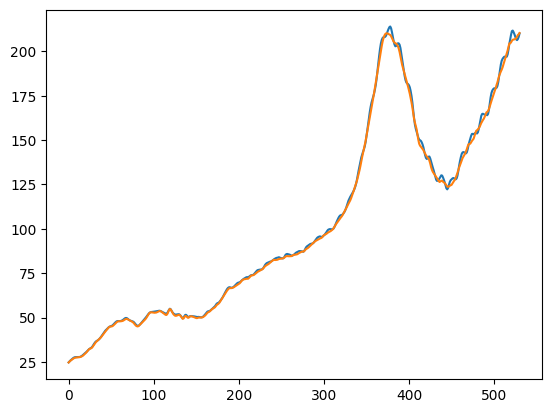

In [8]:
plt.plot(df['NSA Value'])
plt.plot(df['SA Value'])

### HW add auto

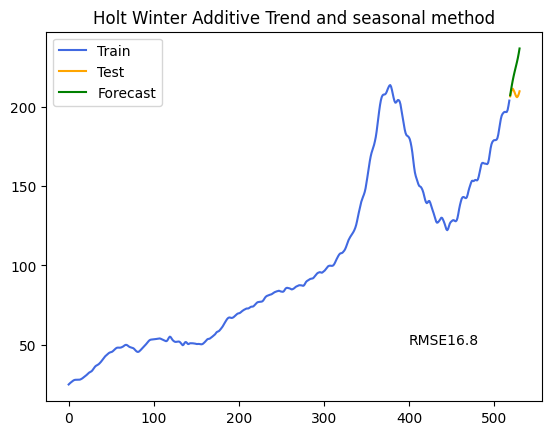

{'smoothing_level': 0.9999999841253878, 'smoothing_trend': 0.999999983723809, 'smoothing_seasonal': 1.48712481305805e-09, 'damping_trend': nan, 'initial_level': 25.575428365957226, 'initial_trend': 0.44911594493857354, 'initial_seasons': array([-1.2845693 , -1.20672062, -0.76134536, -0.13691082,  0.44841926,
        0.86132534,  1.0070112 ,  0.86838786,  0.50910424,  0.01997526,
       -0.51279836, -0.99683985]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
16.796110068983637


In [10]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train_nsa, seasonal_periods=12,
                                trend='add', seasonal='add')
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test_nsa))

y_train_nsa.plot(color= 'royalblue', label = 'Train')
y_test_nsa.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test_nsa, fcast1)),2)
plt.text(400,50, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test_nsa, fcast1))
print(res)

### HW mul auto

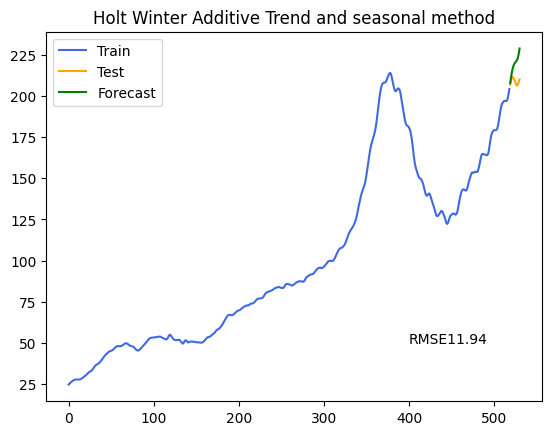

{'smoothing_level': 0.9999999850541632, 'smoothing_trend': 0.9999999850105096, 'smoothing_seasonal': 1.3665393257739505e-08, 'damping_trend': nan, 'initial_level': 25.96228447687118, 'initial_trend': 0.5356666932680255, 'initial_seasons': array([0.93375032, 0.93505467, 0.94034126, 0.94751072, 0.95397844,
       0.9584342 , 0.95990055, 0.9581538 , 0.95400087, 0.94837439,
       0.94218463, 0.93667828]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
11.935564092954499


In [12]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train_nsa, seasonal_periods=12,
                                trend='add', seasonal='mul')
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test_nsa))

y_train_nsa.plot(color= 'royalblue', label = 'Train')
y_test_nsa.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test_nsa, fcast1)),2)
plt.text(400,50, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test_nsa, fcast1))
print(res)

### HW add damped auto

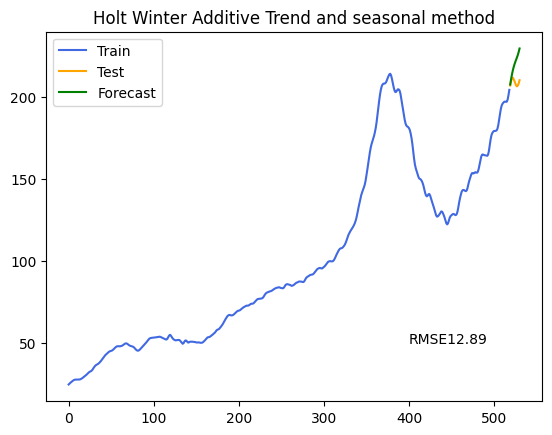

{'smoothing_level': 0.9999999850988388, 'smoothing_trend': 0.9999999850988388, 'smoothing_seasonal': 1.7978225094965093e-09, 'damping_trend': 0.9583080156988304, 'initial_level': 25.560753465744238, 'initial_trend': 0.4876904627625973, 'initial_seasons': array([-1.28817621, -1.20923144, -0.76141718, -0.13569527,  0.45000483,
        0.86258919,  1.00747254,  0.86776491,  0.50732032,  0.01713811,
       -0.51640963, -1.00076129]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
12.894296826167261


In [14]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train_nsa, seasonal_periods=12,
                                trend='add', seasonal='add',
                                damped_trend=True)
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test_nsa))

y_train_nsa.plot(color= 'royalblue', label = 'Train')
y_test_nsa.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test_nsa, fcast1)),2)
plt.text(400,50, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test_nsa, fcast1))
print(res)

### HW mul damped auto

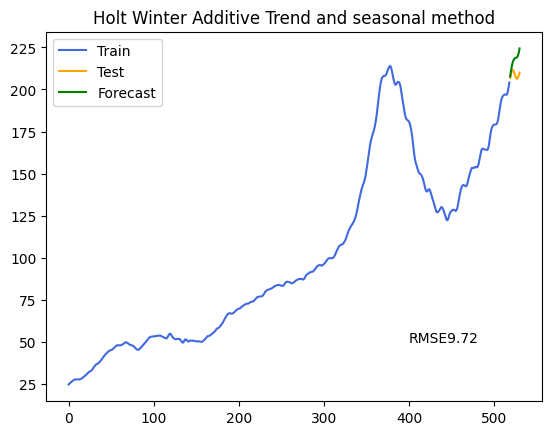

{'smoothing_level': 0.9999999850786212, 'smoothing_trend': 0.9999999850587019, 'smoothing_seasonal': 1.351911630608563e-08, 'damping_trend': 0.969197799514321, 'initial_level': 25.93903577829249, 'initial_trend': 0.5729833735901865, 'initial_seasons': array([0.93381646, 0.93513379, 0.94043562, 0.94760266, 0.9540671 ,
       0.95852022, 0.95998546, 0.95823319, 0.95407569, 0.9484435 ,
       0.94224372, 0.93673867]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
9.722339296992981


In [15]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train_nsa, seasonal_periods=12,
                                trend='add', seasonal='mul',
                                damped_trend=True)
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test_nsa))

y_train_nsa.plot(color= 'royalblue', label = 'Train')
y_test_nsa.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test_nsa, fcast1)),2)
plt.text(400,50, 'RMSE'+str(error))
plt.title('Holt Winter Additive Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test_nsa, fcast1))
print(res)